We are going to take the following approach:

    1. Problem Defination
    2. Data
    3. Evaluation
    4. Features
    5. Modellling
    6. Expermentation

Data Description

* 1. Class: no-recurrence-events, recurrence-events
* 2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
* 3. menopause: lt40, ge40, premeno.
* 4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44,45-49, 50-54, 55-59.
* 5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26,27-29, 30-32, 33-35, 36-39.
* 6. node-caps: yes, no.
* 7. deg-malig: 1, 2, 3.
* 8. breast: left, right.
* 9. breast-quad: left-up, left-low, right-up,	right-low, central.
* 10. irradiat:	yes, no.

## Import all tools we need

In [227]:
# Regular EDA (Explaratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Evaulation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.inspection import permutation_importance

In [117]:
# Load Data
df = pd.read_csv("data/breast-cancer.csv")
df.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [118]:
df.dtypes

no-recurrence-events    object
30-39                   object
premeno                 object
30-34                   object
0-2                     object
no                      object
3                        int64
left                    object
left_low                object
no.1                    object
dtype: object

In [119]:
# Renaming the columns to get a better understanding
df.columns = ["events", "age", "menopause", "tumor size", "inv-nodes", "node_caps", "deg_malig", "breast", "breast_quad", "target"]
df.head()

,events,age,menopause,tumor size,inv-nodes,node_caps,deg_malig,breast,breast_quad,target
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [120]:
# Data Exploration (Explore and learn about the data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   events       285 non-null    object
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumor size   285 non-null    object
 4   inv-nodes    285 non-null    object
 5   node_caps    285 non-null    object
 6   deg_malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast_quad  285 non-null    object
 9   target       285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [121]:
df.isna().sum()

events         0
age            0
menopause      0
tumor size     0
inv-nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
target         0
dtype: int64

In [122]:
df.shape

(285, 10)

In [123]:
df["target"].value_counts()

no     217
yes     68
Name: target, dtype: int64

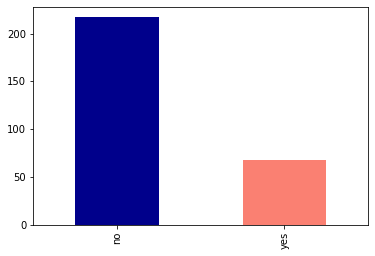

In [124]:
df["target"].value_counts().plot(kind = "bar", color = ["darkblue", "salmon"]);

In [125]:
df.head(1)

,events,age,menopause,tumor size,inv-nodes,node_caps,deg_malig,breast,breast_quad,target
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no


In [126]:
df.head()

,events,age,menopause,tumor size,inv-nodes,node_caps,deg_malig,breast,breast_quad,target
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [127]:
pd.api.types.is_string_dtype(df["events"])

True

In [128]:
# Checking which columns have string datatype
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

events
age
menopause
tumor size
inv-nodes
node_caps
breast
breast_quad
target


In [129]:
# Turning all the string values into category value
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
      df[label] = content.astype("category").cat.as_ordered()

In [130]:
# Turning categorical varibales into numbers
for label, content in df.items():
    if not pd.api.types.is_string_dtype(content):
      df[label] = pd.Categorical(content).codes + 1

In [131]:
# Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   events       285 non-null    int8 
 1   age          285 non-null    int8 
 2   menopause    285 non-null    int8 
 3   tumor size   285 non-null    int8 
 4   inv-nodes    285 non-null    int8 
 5   node_caps    285 non-null    int8 
 6   deg_malig    285 non-null    int8 
 7   breast       285 non-null    int8 
 8   breast_quad  285 non-null    int8 
 9   target       285 non-null    int8 
dtypes: int8(10)
memory usage: 2.9 KB


In [132]:
df["events"].value_counts()

1    200
2     85
Name: events, dtype: int64

In [133]:
pd.crosstab(df.target, df.age)

age,1,2,3,4,5,6
target,,,,,,
1,1,25,64,81,41,5
2,0,10,26,15,16,1


For better umderstanding let's plot a map

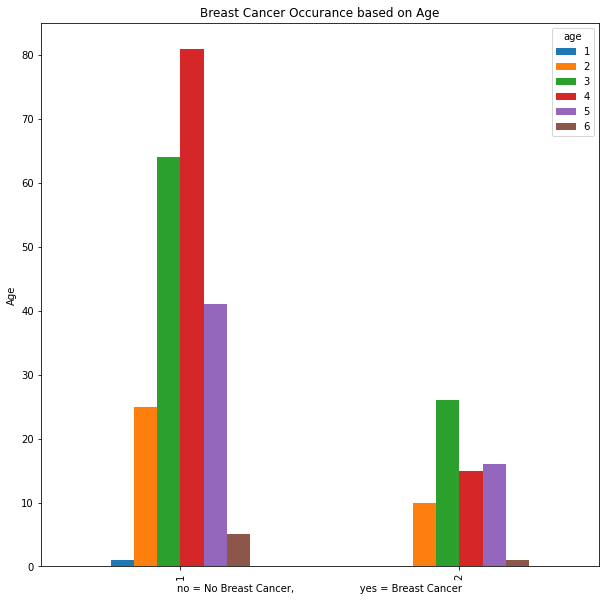

In [134]:
pd.crosstab(df.target, df.age).plot(kind = "bar", figsize = (10, 10))

plt.title("Breast Cancer Occurance based on Age")
plt.xlabel("no = No Breast Cancer,                     yes = Breast Cancer")
plt.ylabel("Age");

In [135]:
pd.crosstab(df.target, df.breast)

breast,1,2
target,,
1,116,101
2,35,33


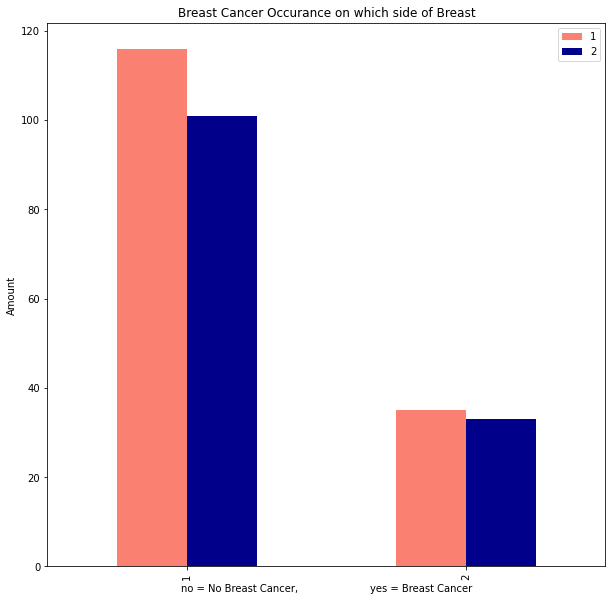

In [136]:
pd.crosstab(df.target, df.breast).plot(kind = "bar", figsize = (10, 10), color = ("salmon", "darkblue"))

plt.title("Breast Cancer Occurance on which side of Breast")
plt.xlabel("no = No Breast Cancer,                       yes = Breast Cancer")
plt.ylabel("Amount")
plt.legend();

Right side breast shows a slightly higher rate than the left side to get cancer.

In [137]:
# Make a correlation matrix
df.corr()

,events,age,menopause,tumor size,inv-nodes,node_caps,deg_malig,breast,breast_quad,target
events,1.000000,-0.075897,0.054770,0.176498,0.275416,0.236947,0.303457,-0.060927,0.035537,0.192887
age,-0.075897,1.000000,-0.719430,-0.007522,-0.047671,-0.095724,-0.079114,-0.047497,-0.054291,-0.045551
menopause,0.054770,-0.719430,1.000000,0.000772,-0.026908,0.069406,-0.047964,0.061345,0.095659,0.043687
tumor size,0.176498,-0.007522,0.000772,1.000000,0.169965,0.187775,0.216500,0.051622,0.152025,0.165634
inv-nodes,0.275416,-0.047671,-0.026908,0.169965,1.000000,0.485813,0.336050,-0.022711,0.043859,0.324007
node_caps,0.236947,-0.095724,0.069406,0.187775,0.485813,1.000000,0.331588,0.022721,0.070547,0.196027
deg_malig,0.303457,-0.079114,-0.047964,0.216500,0.336050,0.331588,1.000000,-0.048827,0.034380,0.211362
breast,-0.060927,-0.047497,0.061345,0.051622,-0.022711,0.022721,-0.048827,1.000000,0.211861,0.016957
breast_quad,0.035537,-0.054291,0.095659,0.152025,0.043859,0.070547,0.034380,0.211861,1.000000,0.017020
target,0.192887,-0.045551,0.043687,0.165634,0.324007,0.196027,0.211362,0.016957,0.017020,1.000000


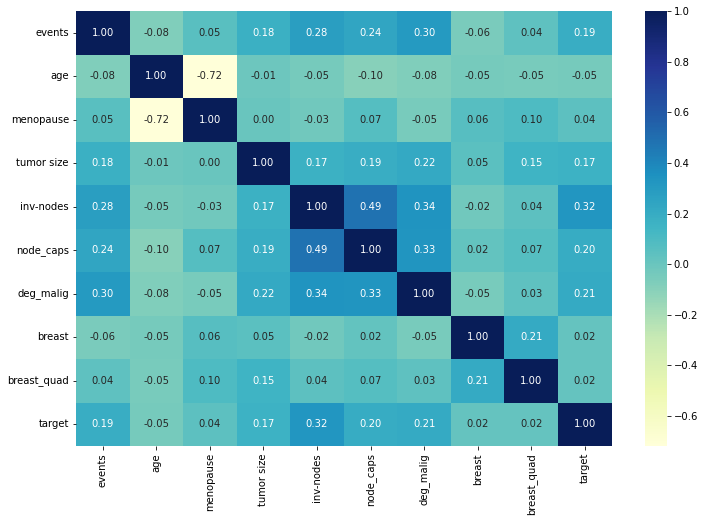

In [138]:
# Let's make our correlation matrix more visual
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(df.corr(),
                 annot=True,
                 fmt = ".2f",
                 cmap = "YlGnBu");

We will only consider feature correlations that >=0.8 or <=-0.8 are strong correlation.

In [139]:
# Checking missing data
df.isna().sum()

events         0
age            0
menopause      0
tumor size     0
inv-nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
target         0
dtype: int64

# Modelling

There is no missing data. So we can proceed...

In [140]:
# Split data into x and y
x = df.drop("target", axis = 1)
y = df["target"]

# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

We are going to use 4 models:

    1. Logistic Regression
    2. K-Nearest Neighbors
    3. Random Forest Classifier
    4. Gaussian NB

In [141]:
# Put model in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "K-Neighbours Classifier" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier(),
          "GaussianNB" : GaussianNB(),
          "XGBoostClassifier" : XGBClassifier()}


In [142]:
# Create a function to fit and score models
def fit_and_score (models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    """
    # Random setup
    np.random.seed(42)
    
    # Empty dictionary
    model_scores = {}
    
    # Loop through models
    for names, model in models.items():
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[names] = model.score(x_test, y_test)
    return model_scores

In [143]:
model_scores = fit_and_score (models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\Win10\Desktop\data-science-projects\breast-cancer-project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Win10\Desktop\data-science-projects\breast-cancer-project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:11:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'Logistic Regression': 0.8421052631578947,
 'K-Neighbours Classifier': 0.8421052631578947,
 'Random Forest': 0.8421052631578947,
 'GaussianNB': 0.8596491228070176,
 'XGBoostClassifier': 0.7719298245614035}

In [144]:
model_table = pd.DataFrame(model_scores, index = ["Scores"])
model_table

,Logistic Regression,K-Neighbours Classifier,Random Forest,GaussianNB,XGBoostClassifier
Scores,0.842105,0.842105,0.842105,0.859649,0.77193


### Model Comparsion

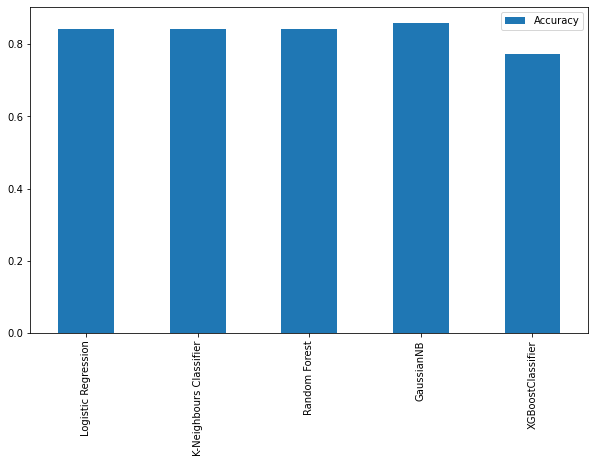

In [145]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar(figsize = (10, 6));

Gaussian NB has got 80% accuracy which is higher compared to other model. Let's calculate some other factors as well:

Let's look at the following:

* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

### Hyperpameter Tuning with RandomizedCV

We will tune Hyperparameters on `GaussianNB()`, `LogisticRegression()` and `KNeighborsClassifier()`.

In [146]:
# Create a hyperparameter grid for GaussianNB()
gs_NB_grid = {"var_smoothing" : np.logspace(0,-9, num=100)}

# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Create hyperparameter grid for KNeighborsClassifier()
knn_grid = {"leaf_size" : list(range(1,50)),
           "n_neighbors" : list(range(1,30)),
           "p" : [1,2]}

Now we have got hyperparameter grid setup for each of our models, let's tune them using RandomizedSearchCV

In [147]:
# Setup random hyperparameter search for LogisticRegression
gs_NB_rs = RandomizedSearchCV(GaussianNB(), 
                 param_distributions = gs_NB_grid, 
                 cv=5,   # use any cross validation technique 
                 verbose=1,
                 n_iter = 20,
                 random_state = 42)
    
gs_NB_rs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, verbose=1)

In [148]:
log_reg_rs = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True,
                                random_state = 42)
    
log_reg_rs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [149]:
knn_rs = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions = knn_grid,
                                cv=5, 
                                n_iter = 20, 
                                verbose=True,
                                random_state = 42)
knn_rs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2]},
                   random_state=42, verbose=True)

In [150]:
gs_NB_rs.best_params_

{'var_smoothing': 0.001873817422860383}

In [151]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [152]:
knn_rs.best_params_

{'p': 2, 'n_neighbors': 26, 'leaf_size': 19}

In [153]:
gs_NB_rs.score(x_test, y_test)

0.8771929824561403

In [154]:
log_reg_rs.score(x_test, y_test)


0.8245614035087719

In [155]:
knn_rs.score(x_test, y_test)

0.8421052631578947

GaussianNB's score increased, LogisticRegression's score decreased, KNeighborsClassifier's score is the same

In [163]:
# Let's try GridSearchCV on GaussianNB

gs_NB_gs = GridSearchCV(estimator = GaussianNB(), 
                 param_grid = gs_NB_grid, 
                 cv = 5,
                 verbose=1)
gs_NB_gs.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [164]:
gs_NB_gs.best_params_

{'var_smoothing': 0.005336699231206307}

In [165]:
gs_NB_gs.score(x_test, y_test)

0.8771929824561403

In [176]:
gs_y_preds = gs_NB_gs.predict(x_test)
def evaluate_preds (y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels and y_preds labels on our classification model.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    
    metric_dict = {"accuracy" : round(accuracy, 2),
                   "precision" : round(precision, 2),
                   "recall" : round(recall, 2),
                   "f1" : round(f1, 2)} 
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [177]:
y_preds = gs_NB_gs.predict(x_test)
gs_metrics = evaluate_preds(y_test, y_preds)

Accuracy: 87.72%
Precision: 0.93
Recall: 0.91
F1: 0.92


In [182]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.93      0.91      0.92        47
           2       0.64      0.70      0.67        10

    accuracy                           0.88        57
   macro avg       0.79      0.81      0.80        57
weighted avg       0.88      0.88      0.88        57



### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision (Cross-validated)
* Recall (Cross-validated)
* F1 Score (Cross-validated)

C:\Users\Win10\Desktop\data-science-projects\breast-cancer-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


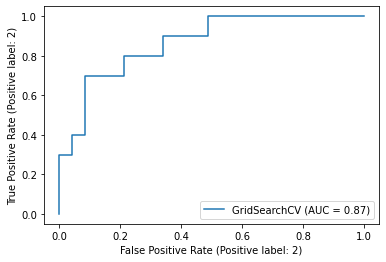

In [175]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_NB_gs, x_test, y_test);

In [183]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[43  4]
 [ 3  7]]


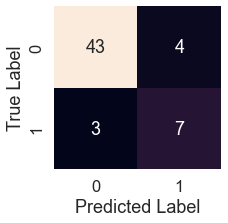

In [202]:
# Improve visualization for confusion matrix
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using seaborn's heatmap.
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
            
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
plot_conf_mat(y_test, y_preds);

Now we have got ROC curve, ab AUC metric and a confusion matrix, let's get cross-validated precision, recall and f1 score.

### Calculate evaluation metrics using cross-validation

We are going to calculate accuracy, precision, recall and f1 score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [204]:
# Get the best hyperparameters for GaussianNB
gs_NB_gs.best_params_

{'var_smoothing': 0.005336699231206307}

In [207]:
# Create a classifier with best params
clf = GaussianNB(var_smoothing = 0.005336699231206307)

In [219]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring = "accuracy")

cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.6807017543859649

In [220]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring = "precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8554540429124226

In [221]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring = "recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.7441860465116279

In [222]:
# Cross-validated f1 score
cv_f1_score = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring = "f1")

cv_f1 = np.mean(cv_f1_score)
cv_f1

0.7002576123153004

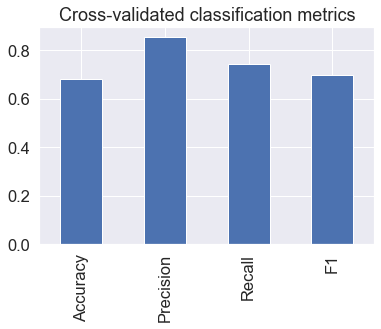

In [223]:
# Visualizing our cross_validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_accuracy,
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "F1" : cv_f1},
                            index = [0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", legend = False);

## Permutation Importance

Let's find the permutation importance for our `GaussianNB()` model...

In [225]:
# Fit an instance of GaussianNB
clf.fit(x_train, y_train)

GaussianNB(var_smoothing=0.005336699231206307)

In [239]:
imps = permutation_importance(clf, x_test, y_test)
perm_dict = dict(zip(df.columns, list(imps.importances_mean)))
perm_dict

{'events': 0.01754385964912277,
 'age': 0.0,
 'menopause': 0.0,
 'tumor size': 0.021052631578947344,
 'inv-nodes': 0.05964912280701753,
 'node_caps': -2.2204460492503132e-17,
 'deg_malig': 0.021052631578947344,
 'breast': 0.0,
 'breast_quad': 0.0070175438596491}

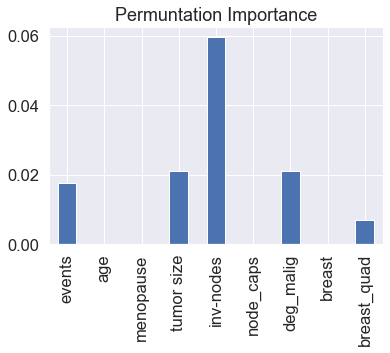

In [240]:
# Visualize feature importance
perm_df = pd.DataFrame(perm_dict, index = [0])
perm_df.T.plot.bar(title = "Permuntation Importance", legend = False);

As we can see, age, menopause, node_caps and breast side shows contributes no importance to data. Where as inv-nodes contributes more to the data. Therefore we can collect more data on these features or maybe remove them from our dataset to get more accurate results.

In [242]:
# Make predictions with tuned models
y_preds = gs_NB_gs.predict(x_test)
y_preds

array([1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1], dtype=int8)

In [244]:
y_test.head()

83     1
81     1
265    1
128    2
165    1
Name: target, dtype: int8

In [250]:
df_results = pd.DataFrame(y_test)
df_results

,target
83,1
81,1
265,1
128,2
165,1
71,1
131,1
86,1
137,2
256,2
